In [302]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import  OneHotEncoder, OrdinalEncoder, LabelEncoder, MinMaxScaler, FunctionTransformer,StandardScaler,MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import scipy.stats as stats
from sklearn.metrics import accuracy_score

In [303]:
df=pd.read_csv("./datasets/train.csv")

# Know the distribution of the data

In [304]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [305]:
df=df[["Survived","Age","Fare"]]

In [306]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [307]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [308]:
si=SimpleImputer()

In [309]:
si.fit(df[["Age"]])

SimpleImputer()

In [310]:
df[["Age"]]=si.transform(df[["Age"]])

In [311]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

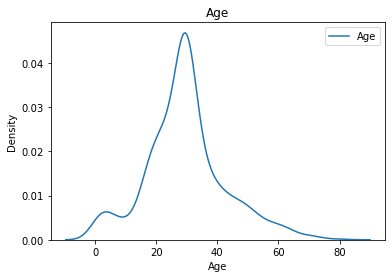

In [312]:
sns.kdeplot(df["Age"],label="Age")
plt.title("Age")
plt.legend()
plt.show()

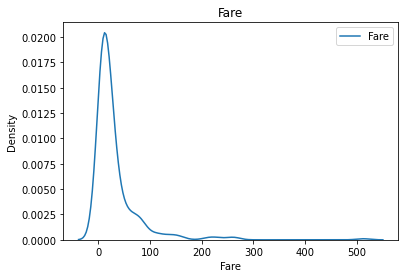

In [313]:
sns.kdeplot(df["Fare"],label="Fare")
plt.title("Fare")
plt.legend()
plt.show()

In [314]:
df.describe()

,Survived,Age,Fare
count,891.000000,891.000000,891.000000
mean,0.383838,29.699118,32.204208
std,0.486592,13.002015,49.693429
min,0.000000,0.420000,0.000000
25%,0.000000,22.000000,7.910400
50%,0.000000,29.699118,14.454200
75%,1.000000,35.000000,31.000000
max,1.000000,80.000000,512.329200


# Split the data

In [315]:
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,1:],df.iloc[:,0:1])

In [316]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((668, 2), (223, 2), (668, 1), (223, 1))

In [317]:
X_train.head(2)

,Age,Fare
682,20.000000,9.225
126,29.699118,7.750


In [318]:
y_train.head(1)

,Survived
682,0


In [319]:
st=StandardScaler()

In [320]:
st.fit(X_train)

StandardScaler()

In [321]:
X_train_transform=st.transform(X_train)
X_test_transform=st.transform(X_test)

In [322]:
X_train_transform=pd.DataFrame(X_train_transform,columns=X_train.columns)
X_test_transform=pd.DataFrame(X_test_transform,columns=X_test.columns)

In [323]:
X_train_transform.head(1)

,Age,Fare
0,-0.7453,-0.472307


In [324]:
X_test_transform.head(1)

,Age,Fare
0,0.669783,-0.498818


<AxesSubplot:xlabel='Age', ylabel='Density'>

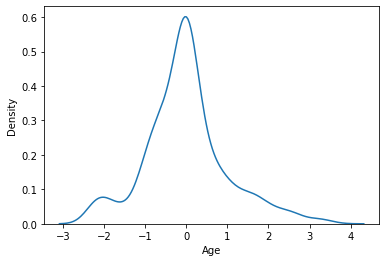

In [325]:
sns.kdeplot(X_train_transform["Age"])

<AxesSubplot:xlabel='Fare', ylabel='Density'>

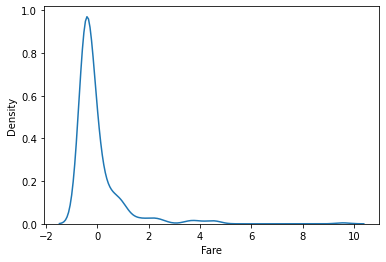

In [326]:
sns.kdeplot(X_train_transform["Fare"])

If you think that, there is no requirement of the FunctionTransformer to make the normal distribution of data, because we can do StandardScaler for that. So for kind of information i will let you know that, distribution of whole data is changed, like mean and variace chance only for the column(mean=0 and variance=1). But distribution of data is same only. So to make the distribution of data to normal, We should have to use the FunctionTransformer.

# Now again come to the data distribution before Standarization

#### As we can see below graph, Fare is right skew, so log transformation would be good for the machine learning algorithm

In [327]:
X_train.head(5)

,Age,Fare
682,20.000000,9.2250
126,29.699118,7.7500
229,29.699118,25.4667
189,36.000000,7.8958
258,35.000000,512.3292


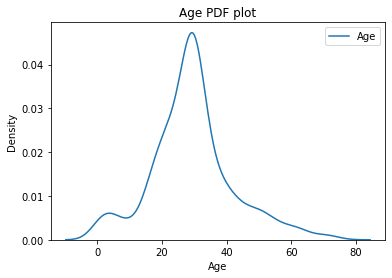

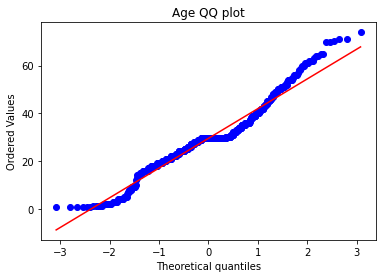

In [328]:
sns.kdeplot(X_train["Age"],label="Age")
plt.legend()
plt.title("Age PDF plot")
plt.show()
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.title("Age QQ plot")
plt.show()

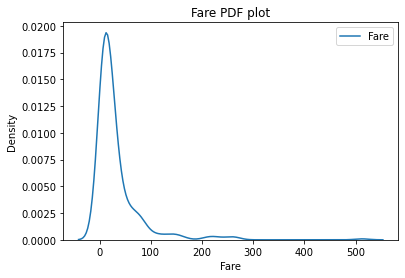

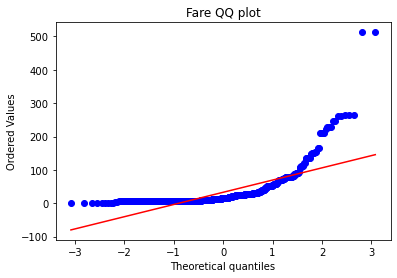

In [329]:
sns.kdeplot(X_train["Fare"],label="Fare")
plt.title("Fare PDF plot")
plt.legend()
plt.show()
stats.probplot(X_train["Fare"],dist='norm',plot=plt)
plt.title("Fare QQ plot")
plt.show()

# Train without any transformation

In [330]:
clf1=DecisionTreeClassifier()
clf2=LogisticRegression()

In [331]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

/home/ajit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [332]:
t_pred=clf1.predict(X_test)
l_pred=clf2.predict(X_test)

In [333]:
print("Accuracy_score by train",accuracy_score(y_test,t_pred))
print("Accuracy_score by logistic",accuracy_score(y_test,l_pred))

Accuracy_score by train 0.6457399103139013
Accuracy_score by logistic 0.6322869955156951


In [334]:
print("cross_val by tree",cross_val_score(clf1,X_train,y_train,cv=5,scoring="accuracy").mean())
print("cross_val by Logistic", cross_val_score(clf2,X_train,y_train,cv=5,scoring="accuracy").mean())

cross_val by tree 0.6330939288519806
cross_val by Logistic 0.6661317472786443


/home/ajit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ajit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ajit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ajit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

# Train After the Standarization

In [335]:
clf1=DecisionTreeClassifier()
clf2=LogisticRegression()

In [336]:
clf1.fit(X_train_transform,y_train)
clf2.fit(X_train_transform,y_train)

/home/ajit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [337]:
t_pred=clf1.predict(X_test_transform)
l_pred=clf2.predict(X_test_transform)

In [338]:
print("Accuracy_score by train",accuracy_score(y_test,t_pred))
print("Accuracy_score by logistic",accuracy_score(y_test,l_pred))

Accuracy_score by train 0.6591928251121076
Accuracy_score by logistic 0.6322869955156951


In [339]:
print("cross_val by tree",cross_val_score(clf1,X_train,y_train,cv=5,scoring="accuracy").mean())
print("cross_val by Logistic", cross_val_score(clf2,X_train,y_train,cv=5,scoring="accuracy").mean())

cross_val by tree 0.6346089103355405
cross_val by Logistic 0.6661317472786443


/home/ajit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ajit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ajit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ajit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

# Function_transform

In [340]:
def func11(x):
    return np.logx

In [341]:
funt=FunctionTransformer(func=np.log1p)

In [342]:
X_train[["Fare"]]=funt.fit_transform(X_train[["Fare"]])
X_test[["Fare"]]=funt.transform(X_test[["Fare"]])

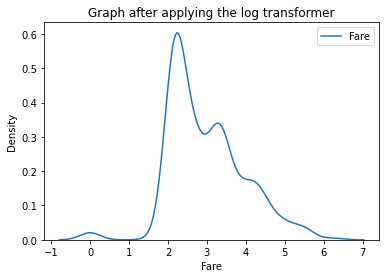

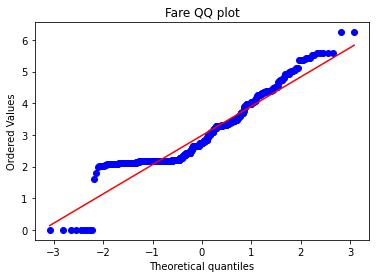

In [343]:
sns.kdeplot(X_train["Fare"],label="Fare")
plt.title("Graph after applying the log transformer")
plt.legend()
plt.show()
stats.probplot(X_train["Fare"],dist='norm',plot=plt)
plt.title("Fare QQ plot")
plt.show()


# Train after applying Transformation

In [344]:
clf1=DecisionTreeClassifier()
clf2=LogisticRegression()

In [345]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

/home/ajit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [346]:
t_pred=clf1.predict(X_test)
l_pred=clf2.predict(X_test)

In [347]:
print("Accuracy_score by tree", accuracy_score(t_pred,y_test))
print("Accuracy_score by Logistic", accuracy_score(l_pred,y_test))

Accuracy_score by tree 0.6502242152466368
Accuracy_score by Logistic 0.6502242152466368


In [348]:
print("cross_val by tree",cross_val_score(clf1,X_train,y_train,cv=5,scoring="accuracy").mean())
print("cross_val by Logistic", cross_val_score(clf2,X_train,y_train,cv=5,scoring="accuracy").mean())

cross_val by tree 0.6346089103355405
cross_val by Logistic 0.6781057120412973


/home/ajit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ajit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ajit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ajit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape

# Train After transformation and standarization both

In [349]:
std=StandardScaler()

In [350]:
std.fit(X_train)
X_train=std.transform(X_train)
X_test=std.transform(X_test)

In [351]:
X_train=pd.DataFrame(X_train,columns=["Age","Fare"])
X_test=pd.DataFrame(X_test,columns=X_train.columns)

In [352]:
np.round(X_train.describe(),1)

,Age,Fare
count,668.0,668.0
mean,-0.0,-0.0
std,1.0,1.0
min,-2.3,-3.1
25%,-0.6,-0.8
50%,0.0,-0.3
75%,0.4,0.5
max,3.5,3.4


In [353]:
np.round(X_test.describe(),1)

,Age,Fare
count,223.0,223.0
mean,0.1,-0.1
std,1.1,1.0
min,-2.3,-3.1
25%,-0.6,-0.8
50%,0.0,-0.4
75%,0.7,0.5
max,4.0,3.4


In [354]:
clf1=DecisionTreeClassifier()
clf2=LogisticRegression()

In [355]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

/home/ajit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [356]:
t_pred=clf1.predict(X_test)
l_pred=clf2.predict(X_test)

In [357]:
print("Accuracy_score by tree", accuracy_score(t_pred,y_test))
print("Accuracy_score by the logistic", accuracy_score(l_pred,y_test))

Accuracy_score by tree 0.6457399103139013
Accuracy_score by the logistic 0.6502242152466368


In [358]:
print("cross_val by tree",cross_val_score(clf1,X_train,y_train,cv=5,scoring="accuracy").mean())
print("cross_val by Logistic", cross_val_score(clf2,X_train,y_train,cv=5,scoring="accuracy").mean())

cross_val by tree 0.6360790034788464
cross_val by Logistic 0.6781057120412973


/home/ajit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ajit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ajit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ajit/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape